## Agenda
- Decision Tree
- Decision Tree Types
- Decision Tree Algorithems
- Decision Tree Terminologies


## Decision Tree
- It is one of Classification model,looks like a flow chart
- can easily understand

## Decision Tree Types
- 2 types
    1. Decision Tree Classifier
        - depends on categorical data(target)
    2. Decision Tree Regressor
        - depends on coutinuous data(target)

## Decision Tree Algorithems
1. CART-Classification and Regression
    - Gini index
        - calculating the gini impurity
        - Varies from 0-1
            - gini(A)=gini(D)-gini(A)(D)
2. ID3 - Iterative dechotomiser Algorithem
    - Entropy 
        - measures randomness in data
        - varies from 0-1
         - H(s)=-p(yes)log2p(yes)-p(no)log2p(no)
     - Information Gain
          - To reduce entropy
          - IG=H(s)-avg*H(D)

## Terminilogies i DecisionTree
- Root Node
- Branches
- Leaf


In [1]:
## 1.Take data
import pandas as pd
import numpy as np
df=pd.read_csv("https://raw.githubusercontent.com/AP-State-Skill-Development-Corporation/Machine-Learning-Using-Python-EB8/master/Day6_21Nov2020/salaries.csv")
df.head()

,company,job,degree,salary_more_then_100k
0,google,sales executive,bachelors,0
1,google,sales executive,masters,0
2,google,business manager,bachelors,1
3,google,business manager,masters,1
4,google,computer programmer,bachelors,0


In [6]:
df.shape

(16, 4)

In [7]:
## 2.Preprocessing
df.isnull().sum()

company                  0
job                      0
degree                   0
salary_more_then_100k    0
dtype: int64

In [10]:
## 3.Defining features and target
x=df.drop(["salary_more_then_100k"],axis="columns")
print("Dimension of x:",np.ndim(x))
x

Dimension of x: 2


,company,job,degree
0,google,sales executive,bachelors
1,google,sales executive,masters
2,google,business manager,bachelors
3,google,business manager,masters
4,google,computer programmer,bachelors
5,google,computer programmer,masters
6,abc pharma,sales executive,masters
7,abc pharma,computer programmer,bachelors
8,abc pharma,business manager,bachelors
9,abc pharma,business manager,masters


In [13]:
## Traget 
y=df[["salary_more_then_100k"]]
print("Dimension of y:",np.ndim(y))
y

Dimension of y: 2


,salary_more_then_100k
0,0
1,0
2,1
3,1
4,0
5,1
6,0
7,0
8,0
9,1


#### 4.Data Pipeling
- The input fetaures are object type.So we have to convert that into int/float.
    beacuse the machine can understand only digits

In [14]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [15]:
le_company=LabelEncoder()
le_job=LabelEncoder()
le_degree=LabelEncoder()

In [17]:
x["company"]=le_company.fit_transform(x["company"])
x["job"]=le_job.fit_transform(x["job"])
x["degree"]=le_degree.fit_transform(x["degree"])

In [18]:
x

,company,job,degree
0,2,2,0
1,2,2,1
2,2,0,0
3,2,0,1
4,2,1,0
5,2,1,1
6,0,2,1
7,0,1,0
8,0,0,0
9,0,0,1


In [29]:
## 5.fitting the data to the model 
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier(criterion='entropy')
dtc.fit(x,y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [30]:
## 6.Preciting the output
pre=dtc.predict(x)
pre

array([0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [31]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [32]:
accuracy_score(y,pre)

1.0

In [33]:
confusion_matrix(y,pre)

array([[ 6,  0],
       [ 0, 10]], dtype=int64)

In [34]:
## predict somthing new
dtc.predict([["1","1","0"]])

array([1], dtype=int64)

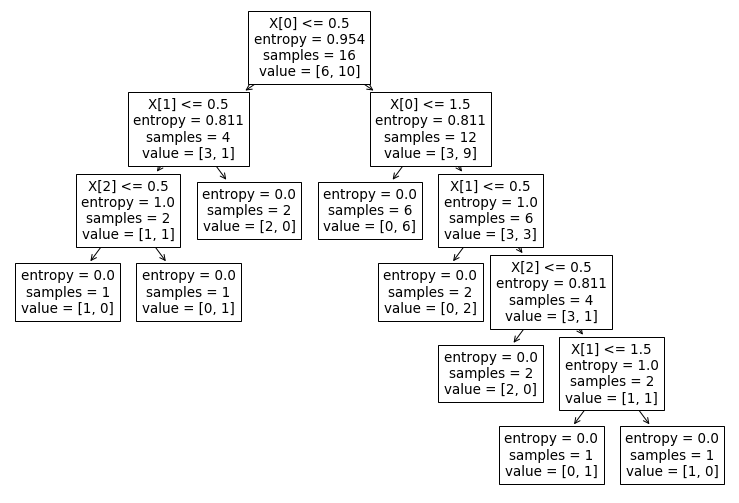

In [35]:
import matplotlib.pyplot as plt
from sklearn import tree
plt.figure(figsize=(13,9))
tree.plot_tree(dtc)
plt.show()

In [36]:
## pydotplus
## graphviz

In [ ]:
## apply decision tree classifier to iris data set